In [1]:
import pandas as pd

In [2]:
IEA = pd.read_csv('C:\\Users\\HP\\Desktop\\IEA Global EV Data 2024.csv')

In [3]:
IEA.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [4]:
IEA.describe()

,year,value
count,12654.000000,1.265400e+04
mean,2019.822112,4.273742e+05
std,5.476494,6.860498e+06
min,2010.000000,1.200000e-06
25%,2016.000000,2.000000e+00
50%,2020.000000,1.300000e+02
75%,2022.000000,5.500000e+03
max,2035.000000,4.400000e+08


In [5]:
IEA.duplicated().sum()

0

In [6]:
IEA.shape

(12654, 8)

In [7]:
IEA.nunique()

region          54
category         3
parameter        8
mode             5
powertrain       6
year            17
unit             6
value         1032
dtype: int64

In [8]:
IEA.describe()

,year,value
count,12654.000000,1.265400e+04
mean,2019.822112,4.273742e+05
std,5.476494,6.860498e+06
min,2010.000000,1.200000e-06
25%,2016.000000,2.000000e+00
50%,2020.000000,1.300000e+02
75%,2022.000000,5.500000e+03
max,2035.000000,4.400000e+08


In [9]:
IEA.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [10]:
IEA['region'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'EU27', 'Europe',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Rest of the world', 'Romania', 'Seychelles', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Turkiye', 'United Arab Emirates', 'United Kingdom',
       'USA', 'World'], dtype=object)

In [11]:
IEA['category'].unique()

array(['Historical', 'Projection-STEPS', 'Projection-APS'], dtype=object)

In [12]:
IEA['mode'].unique()

array(['Cars', 'EV', 'Buses', 'Vans', 'Trucks'], dtype=object)

In [13]:
IEA['powertrain'].unique()

array(['EV', 'BEV', 'PHEV', 'Publicly available fast',
       'Publicly available slow', 'FCEV'], dtype=object)

In [14]:
IEA['parameter'].unique()

array(['EV stock share', 'EV sales share', 'EV sales', 'EV stock',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

In [15]:
IEA['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2010, 2025, 2030, 2035], dtype=int64)

In [16]:
IEA['unit'].unique()

array(['percent', 'Vehicles', 'charging points', 'GWh',
       'Milion barrels per day', 'Oil displacement, million lge'],
      dtype=object)

# EXPLORING THE DATA

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# to import the label encoder module
from sklearn import preprocessing

# to create a label encoder object
label_encoder = preprocessing.LabelEncoder()


In [19]:
IEA['parameter']= label_encoder.fit_transform(IEA['parameter'])
IEA['region']= label_encoder.fit_transform(IEA['region'])
IEA['mode']= label_encoder.fit_transform(IEA['mode'])
IEA['category']= label_encoder.fit_transform(IEA['category'])
IEA['powertrain']= label_encoder.fit_transform(IEA['powertrain'])
IEA['unit']= label_encoder.fit_transform(IEA['unit'])
IEA['value']= label_encoder.fit_transform(IEA['value'])


In [20]:
IEA_corrMatrix=IEA.corr()
IEA_corrMatrix

,region,category,parameter,mode,powertrain,year,unit,value
region,1.000000,0.090069,0.042196,-0.027437,0.001209,0.067707,-0.050171,0.067000
category,0.090069,1.000000,0.161800,0.058835,0.010632,0.597732,-0.192296,0.242811
parameter,0.042196,0.161800,1.000000,0.011160,-0.330243,0.073292,-0.377877,-0.302760
mode,-0.027437,0.058835,0.011160,1.000000,0.002021,0.052736,-0.003556,-0.039115
powertrain,0.001209,0.010632,-0.330243,0.002021,1.000000,0.051739,0.068909,0.145003
year,0.067707,0.597732,0.073292,0.052736,0.051739,1.000000,-0.133297,0.367308
unit,-0.050171,-0.192296,-0.377877,-0.003556,0.068909,-0.133297,1.000000,-0.304714
value,0.067000,0.242811,-0.302760,-0.039115,0.145003,0.367308,-0.304714,1.000000


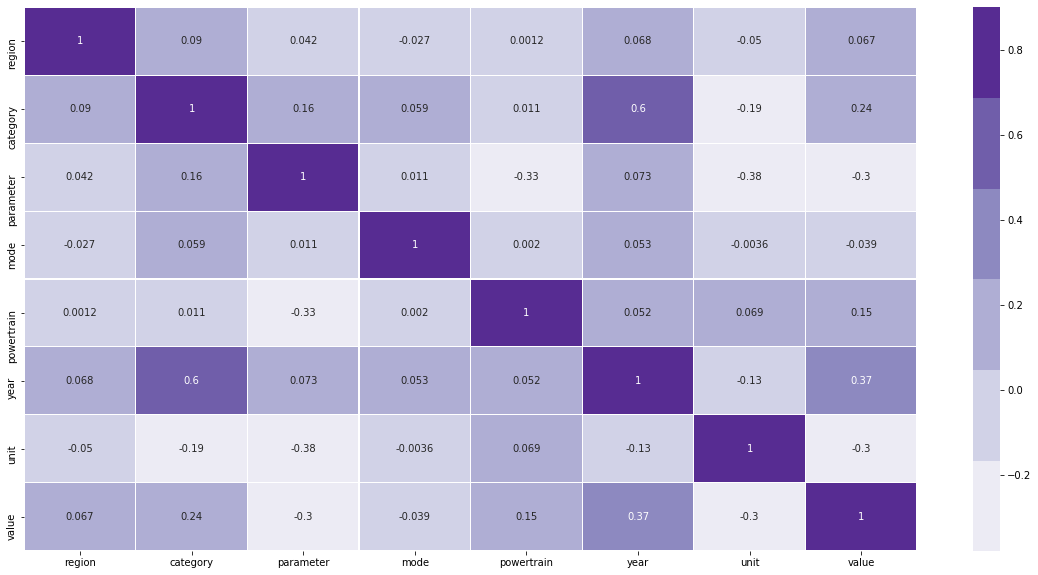

In [21]:
plt.figure(figsize=(20,10))
colormap = sns.color_palette("Purples")
sns.heatmap(IEA_corrMatrix, cmap=colormap, vmax=0.9, annot=True, linecolor="white", linewidth=0.02)

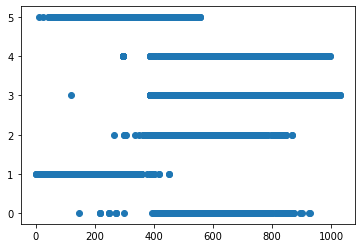

In [22]:
plt.scatter(IEA['value'], IEA['unit'])

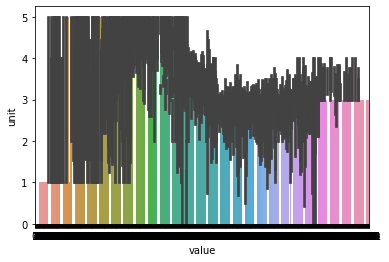

In [24]:
sns.barplot(IEA['value'], IEA['unit'])